In [1]:
library(GO.db)
library(topGO)
library(GOSim)
library(org.Sc.sgd.db)
library(igraph)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

 

In [2]:
file <- "yeast_union"

ont <- "MF"
p <- 0.8
init <- 1
eta <- 0.0001

##load all community gene lists
setwd(sprintf("/home/david/Documents/ghsom/%s_communities_%s_%s", file, p, init, eta))

setOntology(ont, loadIC=TRUE)
setEvidenceLevel(evidences="all",organism=org.Sc.sgdORGANISM, gomap=org.Sc.sgdGO)
# calcICs()

db <- org.Sc.sgd.db
mapping <- "org.Sc.sgd.db"
ID <- "ENSEMBL"

#background gene list
backgroundFilename <- "all_genes.txt"
allGenes <- scan(backgroundFilename, character())

#load communities from file
g <- list()
numCom <- 0
filename <- sprintf("community_%s.txt", numCom)
while (file.exists(filename)) {
    numCom <- numCom + 1
    g[[numCom]] <- scan(filename, character())
    filename <- sprintf("community_%s.txt", numCom)
}

#distances between neurons
shortest.path <- read.csv("shortest_path.csv", sep=",", header=FALSE)

initializing GOSim package ...
-> retrieving GO information for all available genes for organism 'human' in GO database
-> filtering GO terms according to evidence levels 'all'
-> loading files with information content for corresponding GO category (human)
finished.
-> loading files with information content for corresponding GO category (human)
-> retrieving GO information for all available genes for organism 'Saccharomyces cerevisiae' in GO database
-> filtering GO terms according to evidence levels 'all'


In [3]:
length(g)

[1] 11

In [22]:
calcICs()

calculating information contents for ontology MF using evidence codes 'all' (Saccharomyces cerevisiae) ...
done


In [4]:
allGeneNames <- scan(character(), file="../yeast_uetz_all_genes.txt")
allGenes <- allGeneNames[as.integer(allGenes)]
g <- sapply(g, function(i) allGeneNames[as.integer(i)])

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

In [4]:
enrichments <- sapply(g, function(i) GOenrichment(i, allGenes, cutoff=0.05, method="weight01"))


Building most specific GOs .....
	( 828 GO terms found. )

Build GO DAG topology ..........
	( 1179 GO terms and 1446 relations. )

Annotating nodes ...............
	( 1567 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 341 nontrivial nodes
		 parameters: 
			 test statistic: fisher

	 Level 14:	1 nodes to be scored	(0 eliminated genes)

	 Level 13:	2 nodes to be scored	(0 eliminated genes)

	 Level 12:	2 nodes to be scored	(4 eliminated genes)

	 Level 11:	5 nodes to be scored	(9 eliminated genes)

	 Level 10:	7 nodes to be scored	(10 eliminated genes)

	 Level 9:	14 nodes to be scored	(42 eliminated genes)

	 Level 8:	30 nodes to be scored	(80 eliminated genes)

	 Level 7:	49 nodes to be scored	(267 eliminated genes)

	 Level 6:	71 nodes to be scored	(327 eliminated genes)

	 Level 5:	69 nodes to be scored	(491 eliminated genes)

	 Level 4:	53 nodes to be scored	(698 eliminated genes)

	 Level 3:	29 nodes to be scored	(894 eliminated g

In [12]:
enrichedGOTerms <- function(genes, allGenes, cutoff, correction, ont, mapping, ID, algorithm){
    interestingGenes <- factor(as.integer(allGenes %in% genes))
    names(interestingGenes) <- allGenes
    
    GOdata <- new("topGOdata", description=sprintf("topGO object"),
              ontology = ont, allGenes = interestingGenes,
              annotationFun = annFUN.org, mapping = mapping, 
              ID = ID, nodeSize = 1)
    
    result <- runTest(GOdata, algorithm = algorithm, statistic = "fisher")
    if (correction){
        GOs <- score(result)[which(p.adjust(score(result), method="BH") <= cutoff)]
    } else {
        GOs <- score(result)[score(result) <= cutoff]
    }
    
    plot <- showSigOfNodes(GOdata, score(result), firstSigNodes = 10, useInfo ='all', swPlot = FALSE)
    
    return(list(GOdata, GOs, plot))
}

In [13]:
enrichedGOs  <- sapply(g, enrichedGOTerms, allGenes=allGenes, 
                      cutoff=0.05, correction=FALSE, ont=ont, mapping=mapping, ID=ID, algorithm="weight01")


Building most specific GOs .....
	( 275 GO terms found. )

Build GO DAG topology ..........
	( 484 GO terms and 597 relations. )

Annotating nodes ...............
	( 250 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 158 nontrivial nodes
		 parameters: 
			 test statistic: fisher

	 Level 15:	1 nodes to be scored	(0 eliminated genes)

	 Level 14:	1 nodes to be scored	(0 eliminated genes)

	 Level 13:	2 nodes to be scored	(1 eliminated genes)

	 Level 12:	1 nodes to be scored	(1 eliminated genes)

	 Level 11:	1 nodes to be scored	(2 eliminated genes)

	 Level 10:	2 nodes to be scored	(2 eliminated genes)

	 Level 9:	7 nodes to be scored	(4 eliminated genes)

	 Level 8:	10 nodes to be scored	(5 eliminated genes)

	 Level 7:	17 nodes to be scored	(45 eliminated genes)

	 Level 6:	27 nodes to be scored	(46 eliminated genes)

	 Level 5:	29 nodes to be scored	(69 eliminated genes)

	 Level 4:	29 nodes to be scored	(92 eliminated genes)

	 Leve

In [5]:
p.values <- enrichments[2,]

In [6]:
lengths(p.values)

[1] 11 10 28 17  9 12 12 21 25 22 16

In [7]:
lengths(g)

[1] 137 114 296 166  84  58  91 279 275  59  88

In [8]:
shortest.path <- shortest.path[lengths(p.values) > 0, lengths(p.values) > 0]

In [9]:
g <- g[sapply(p.values, function(i) length(i) > 0)]
p.values <- p.values[sapply(p.values, function(i) length(i) > 0)]

In [10]:
minimumSubsumers <- function(gos) sapply(gos, function(i) sapply(gos, function (j) getMinimumSubsumer(i, j)))
allMinimumSubsumers <- sapply(p.values, function(i) 
    sort(summary(as.factor(minimumSubsumers(names(i)))), decreasing = TRUE))

In [11]:
allMinimumSubsumers

[[1]]
GO:0003674 GO:0003824 GO:0016740 GO:0005488 GO:0004672 GO:0019787 GO:0003677 
        56         22         16         12          2          2          1 
GO:0004049 GO:0004596 GO:0004712 GO:0004713 GO:0015616 GO:0019789 GO:0031625 
         1          1          1          1          1          1          1 
GO:0061630 GO:0070273 GO:0070300 
         1          1          1 

[[2]]
GO:0003674 GO:0003824 GO:0005488 GO:0016772 GO:0097159 GO:0000049 GO:0000384 
        64         18          4          2          2          1          1 
GO:0000386 GO:0001671 GO:0003677 GO:0003887 GO:0005545 GO:0009927 GO:0009982 
         1          1          1          1          1          1          1 
GO:0015248 
         1 

[[3]]
GO:0003674 GO:0003824 GO:0016740 GO:0005488 GO:0016772 GO:0016773 GO:0005515 
       440        172         32         30         30         12         10 
GO:0004396 GO:0016491 GO:0016779 GO:0004674 GO:0016616 GO:0016765 GO:0016787 
         6          4          4          2          2          2          2 
GO:0016829 GO:0019899 GO:0030234 GO:0070566 GO:0000121 GO:0000309 GO:0001054 
         2          2          2          2          1          1          1 
GO:0001094 GO:0003939 GO:0004340 GO:0004359 GO:0004449 GO:0004478 GO:0004515 
         1          1          1          1          1          1          1 
GO:0004662 GO:0004693 GO:0004707 GO:0005536 GO:0008139 GO:0008270 GO:0008379 
         1          1          1          1          1          1          1 
GO:0008536 GO:0008565 GO:0008599 GO:0008865 GO:0016538 GO:0017112 GO:0019158 
         1          1          1          1          1          1          1 
GO:0019172 GO:0019901 GO:0036381 GO:0042393 
         1          1          1          1 

[[4]]
GO:0003674 GO:0003824 GO:0016740 GO:0016788 GO:0052866 GO:0000030 GO:0005515 
       150         70         12          8          8          6          6 
GO:0015144 GO:0015291 GO:0016747 GO:0022857 GO:0034595 GO:0052744 GO:0000009 
         2          2          2          2          2          2          1 
GO:0000026 GO:0000149 GO:0003756 GO:0004026 GO:0004169 GO:0004438 GO:0004439 
         1          1          1          1          1          1          1 
GO:0004806 GO:0005078 GO:0005351 GO:0005355 GO:0005484 GO:0015297 GO:0043812 
         1          1          1          1          1          1          1 
GO:0043813 GO:0050291 
         1          1 

[[5]]
GO:0003674 GO:0003824 GO:0005488 GO:0016740 GO:0016787 GO:0097159 GO:0000978 
        54          8          4          2          2          2          1 
GO:0001077 GO:0001135 GO:0003887 GO:0003924 GO:0004663 GO:0004725 GO:0005525 
         1          1          1          1          1          1          1 
GO:0030276 
         1 

[[6]]
GO:0003674 GO:0003824 GO:0005488 GO:0005515 GO:0016740 GO:0016787 GO:0003962 
        90         26         10          2          2          2          1 
GO:0004014 GO:0004067 GO:0004347 GO:0004722 GO:0005543 GO:0010997 GO:0015085 
         1          1          1          1          1          1          1 
GO:0017056 GO:0030170 GO:0051087 GO:0061630 
         1          1          1          1 

[[7]]
GO:0003674 GO:0003824 GO:0005488 GO:0016787 GO:0097159 GO:0008094 GO:0004003 
        82         18         14          6          6          4          2 
GO:0000150 GO:0000400 GO:0003689 GO:0003729 GO:0004520 GO:0004791 GO:0005048 
         1          1          1          1          1          1          1 
GO:0005487 GO:0008270 GO:0017056 GO:0043140 GO:0043141 
         1          1          1          1          1 

[[8]]
GO:0003674 GO:0005488 GO:0003824 GO:0005515 GO:0005198 GO:0016740 GO:0097159 
       298         54         34         10          6          4          4 
GO:0001167 GO:0003690 GO:0008134 GO:0016772 GO:0016787 GO:0000384 GO:0001097 
         2          2          2          2          2          1          1 
GO:0001164 GO:0001168 GO:0001187 GO:0003735 GO:0004691 GO:0

In [12]:
minGO <- sapply(p.values, function(i) names(i)[which.min(i)])
maxGO <- sapply(p.values, function(i) names(i)[which.max(i)])

In [13]:
select(GO.db, keys=minGO, columns=c("TERM","DEFINITION"))

'select()' returned 1:1 mapping between keys and columns


GOID,TERM,DEFINITION
GO:0061630,ubiquitin protein ligase activity,"Catalysis of the transfer of ubiquitin to a substrate protein via the reaction X-ubiquitin + S --> X + S-ubiquitin, where X is either an E2 or E3 enzyme, the X-ubiquitin linkage is a thioester bond, and the S-ubiquitin linkage is an isopeptide bond between the C-terminal glycine of ubiquitin and the epsilon-amino group of lysine residues in the substrate. Note that this may include the extension of ubiquitin chains."
GO:0003677,DNA binding,Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
GO:0008139,nuclear localization sequence binding,"Interacting selectively and non-covalently with a nuclear localization sequence, a specific peptide sequence that acts as a signal to localize the protein within the nucleus."
GO:0000026,"alpha-1,2-mannosyltransferase activity","Catalysis of the transfer of a mannose residue to an oligosaccharide, forming an alpha-(1->2) linkage."
GO:0030276,clathrin binding,"Interacting selectively and non-covalently with a clathrin heavy or light chain, the main components of the coat of coated vesicles and coated pits, and which also occurs in synaptic vesicles."
GO:0004722,protein serine/threonine phosphatase activity,"Catalysis of the reaction: protein serine phosphate + H2O = protein serine + phosphate, and protein threonine phosphate + H2O = protein threonine + phosphate."
GO:0003689,DNA clamp loader activity,"Catalysis of the reaction: ATP + H2O = ADP + phosphate, to drive the opening of the ring structure of the PCNA complex, or any of the related sliding clamp complexes, and their closing around the DNA duplex."
GO:0051010,microtubule plus-end binding,Interacting selectively and non-covalently with the plus end of a microtubule.
GO:0042800,histone methyltransferase activity (H3-K4 specific),Catalysis of the reaction: S-adenosyl-L-methionine + histone H3 L-lysine (position 4) = S-adenosyl-L-homocysteine + histone H3 N6-methyl-L-lysine (position 4). This reaction is the addition of a methyl group onto lysine at position 4 of the histone H3 protein.
GO:0001104,RNA polymerase II transcription cofactor activity,"Interacting selectively and non-covalently with an RNA polymerase II (RNAP II) regulatory transcription factor and also with the RNAP II basal transcription machinery in order to modulate transcription. Cofactors generally do not bind DNA, but rather mediate protein-protein interactions between regulatory transcription factors and the basal RNAP II transcription machinery."


In [14]:
select(GO.db, keys=maxGO, columns=c("TERM","DEFINITION"))

'select()' returned many:1 mapping between keys and columns


GOID,TERM,DEFINITION
GO:0015616,DNA translocase activity,"Catalysis of the reaction: ATP + H2O = ADP + phosphate, to drive movement along a single- or double-stranded DNA molecule."
GO:0003887,DNA-directed DNA polymerase activity,Catalysis of the reaction: deoxynucleoside triphosphate + DNA(n) = diphosphate + DNA(n+1); the synthesis of DNA from deoxyribonucleotide triphosphates in the presence of a DNA template and a 3'hydroxyl group.
GO:0008599,protein phosphatase type 1 regulator activity,Modulation of the activity of the enzyme protein phosphatase type 1.
GO:0015297,antiporter activity,Enables the active transport of a solute across a membrane by a mechanism whereby two or more species are transported in opposite directions in a tightly coupled process not directly linked to a form of energy other than chemiosmotic energy. The reaction is: solute A(out) + solute B(in) = solute A(in) + solute B(out).
GO:0004725,protein tyrosine phosphatase activity,Catalysis of the reaction: protein tyrosine phosphate + H2O = protein tyrosine + phosphate.
GO:0030170,pyridoxal phosphate binding,"Interacting selectively and non-covalently with pyridoxal 5' phosphate, 3-hydroxy-5-(hydroxymethyl)-2-methyl4-pyridine carboxaldehyde 5' phosphate, the biologically active form of vitamin B6."
GO:0008270,zinc ion binding,Interacting selectively and non-covalently with zinc (Zn) ions.
GO:0017056,structural constituent of nuclear pore,The action of a molecule that contributes to the structural integrity of the nuclear pore complex.
GO:0043130,ubiquitin binding,"Interacting selectively and non-covalently with ubiquitin, a protein that when covalently bound to other cellular proteins marks them for proteolytic degradation."
GO:0008270,zinc ion binding,Interacting selectively and non-covalently with zinc (Zn) ions.


In [15]:
head(shortest.path)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1,1,1,1,2,1,2,2,2,3
1,0,1,2,2,2,1,1,2,2,3
1,1,0,1,1,1,2,2,1,3,2
1,2,1,0,2,2,2,3,2,3,3
1,2,1,2,0,1,2,3,2,3,2
2,2,1,2,1,0,3,3,1,4,1


In [ ]:
fall <- function(i) !all(is.na(i))
fany <- function(i) !any(is.na(i))
    
l <- length(g)   

geneSims <- sapply(1:l, function(i) {
    sapply(i:l, function(j){
        if (i == j){
            return(1)
        } else {
            #gene sims as dataframe
            t <- getGeneSim(g[[i]], g[[j]], similarity="max", similarityTerm="Resnik", normalization=TRUE)
            ##remove na columns and rows
            t <- t[apply(t, 1, fall), apply(t, 2, fall)]
            ##remove any remaining rows with nan
            t <- t[apply(t, 1, fany),]
            ##BMA
            return((sum(apply(t, 1, max)) + sum(apply(t, 2, max))) / (nrow(t) + ncol(t)))
        }
       
    })
})

filtering out genes not mapping to the currently set GO category ... ===> list of  137 genes reduced to  126 
filtering out genes not mapping to the currently set GO category ... ===> list of  114 genes reduced to  111 


Warning message in getGeneSim(g[[i]], g[[j]], similarity = "max", similarityTerm = "Resnik", :
“Similarity matrix contains values > 1! This may happen with simlarity='funSimMax', if one gene's GO annotation is a complete subset of another gene's GO annotation.”

filtering out genes not mapping to the currently set GO category ... ===> list of  137 genes reduced to  126 
filtering out genes not mapping to the currently set GO category ... ===> list of  296 genes reduced to  286 


Warning message in getGeneSim(g[[i]], g[[j]], similarity = "max", similarityTerm = "Resnik", :
“Similarity matrix contains values > 1! This may happen with simlarity='funSimMax', if one gene's GO annotation is a complete subset of another gene's GO annotation.”

filtering out genes not mapping to the currently set GO category ... ===> list of  137 genes reduced to  126 
filtering out genes not mapping to the currently set GO category ... ===> list of  166 genes reduced to  154 


Warning message in getGeneSim(g[[i]], g[[j]], similarity = "max", similarityTerm = "Resnik", :
“Similarity matrix contains values > 1! This may happen with simlarity='funSimMax', if one gene's GO annotation is a complete subset of another gene's GO annotation.”

filtering out genes not mapping to the currently set GO category ... ===> list of  137 genes reduced to  126 
filtering out genes not mapping to the currently set GO category ... ===> list of  84 genes reduced to  83 


Warning message in getGeneSim(g[[i]], g[[j]], similarity = "max", similarityTerm = "Resnik", :
“Similarity matrix contains values > 1! This may happen with simlarity='funSimMax', if one gene's GO annotation is a complete subset of another gene's GO annotation.”

filtering out genes not mapping to the currently set GO category ... ===> list of  137 genes reduced to  126 
filtering out genes not mapping to the currently set GO category ... ===> list of  58 genes reduced to  55 


Warning message in getGeneSim(g[[i]], g[[j]], similarity = "max", similarityTerm = "Resnik", :
“Similarity matrix contains values > 1! This may happen with simlarity='funSimMax', if one gene's GO annotation is a complete subset of another gene's GO annotation.”

filtering out genes not mapping to the currently set GO category ... ===> list of  137 genes reduced to  126 
filtering out genes not mapping to the currently set GO category ... ===> list of  91 genes reduced to  85 


Warning message in getGeneSim(g[[i]], g[[j]], similarity = "max", similarityTerm = "Resnik", :
“Similarity matrix contains values > 1! This may happen with simlarity='funSimMax', if one gene's GO annotation is a complete subset of another gene's GO annotation.”

filtering out genes not mapping to the currently set GO category ... ===> list of  137 genes reduced to  126 
filtering out genes not mapping to the currently set GO category ... ===> list of  279 genes reduced to  266 


Warning message in getGeneSim(g[[i]], g[[j]], similarity = "max", similarityTerm = "Resnik", :
“Similarity matrix contains values > 1! This may happen with simlarity='funSimMax', if one gene's GO annotation is a complete subset of another gene's GO annotation.”

In [ ]:
head(geneSims)

In [ ]:
geneSimsDF <- sapply(1:length(g), function(i)
    sapply(1:length(g), function(j) {
        
        if (i <= j){
            x <- i
            y <- j - i + 1  
        } else {
            x <- j
            y <- i - j + 1
        }
        
        return(geneSims[[x]] [[y]]) }))

In [ ]:
names <- character()
for (i in 1:length(g)){
    names <- c(names, sprintf("Com %s", i))
}

In [ ]:
rownames(geneSimsDF) <- names
colnames(geneSimsDF) <- names
geneSimsDF <- round(geneSimsDF, 3)
geneSimsDF

In [ ]:
library(gridExtra)
grid.table(geneSimsDF)

In [ ]:
rownames(shortest.path) <- names
colnames(shortest.path) <- names
head(shortest.path)

In [ ]:
shortest.path

In [ ]:
library(gridExtra)
grid.table(shortest.path)

In [58]:
library(GOSemSim)

GOSemSim v2.0.4  For help: https://guangchuangyu.github.io/GOSemSim

If you use GOSemSim in published research, please cite:
Guangchuang Yu, Fei Li, Yide Qin, Xiaochen Bo, Yibo Wu, Shengqi Wang. GOSemSim: an R package for measuring semantic similarity among GO terms and gene products Bioinformatics 2010, 26(7):976-978


In [59]:
scGO <- godata(OrgDb = mapping, keytype = ID, ont = ont)

[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."


In [61]:
wangClusters <- mclusterSim(clusters = g, semData = scGO, measure = "Wang", combine = "BMA")

In [62]:
rownames(wangClusters) <- names
colnames(wangClusters) <- names

In [63]:
wangClusters

,Com 1,Com 2,Com 3,Com 4,Com 5,Com 6
Com 1,1.000,0.607,0.511,0.705,0.692,0.559
Com 2,0.607,1.000,0.530,0.673,0.684,0.622
Com 3,0.511,0.530,1.000,0.642,0.605,0.540
Com 4,0.705,0.673,0.642,1.000,0.720,0.618
Com 5,0.692,0.684,0.605,0.720,1.000,0.637
Com 6,0.559,0.622,0.540,0.618,0.637,1.000


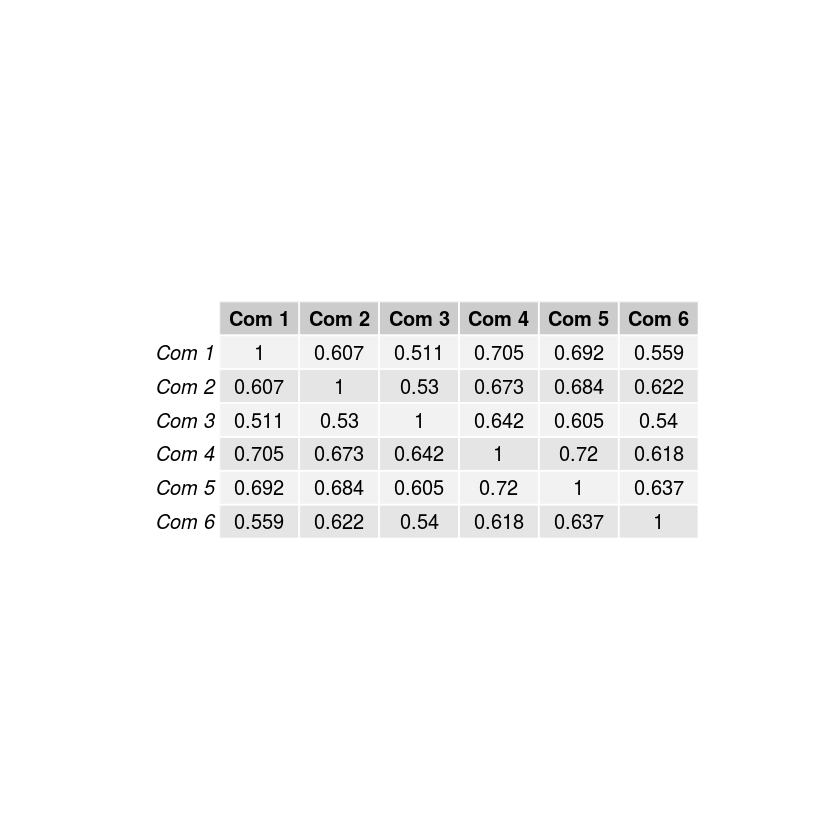

In [64]:
library(gridExtra)
grid.table(wangClusters)

In [65]:
resnikClusters <- mclusterSim(clusters = g, semData = scGO, measure = "Resnik", combine = "BMA")

In [66]:
rownames(resnikClusters) <- names
colnames(resnikClusters) <- names

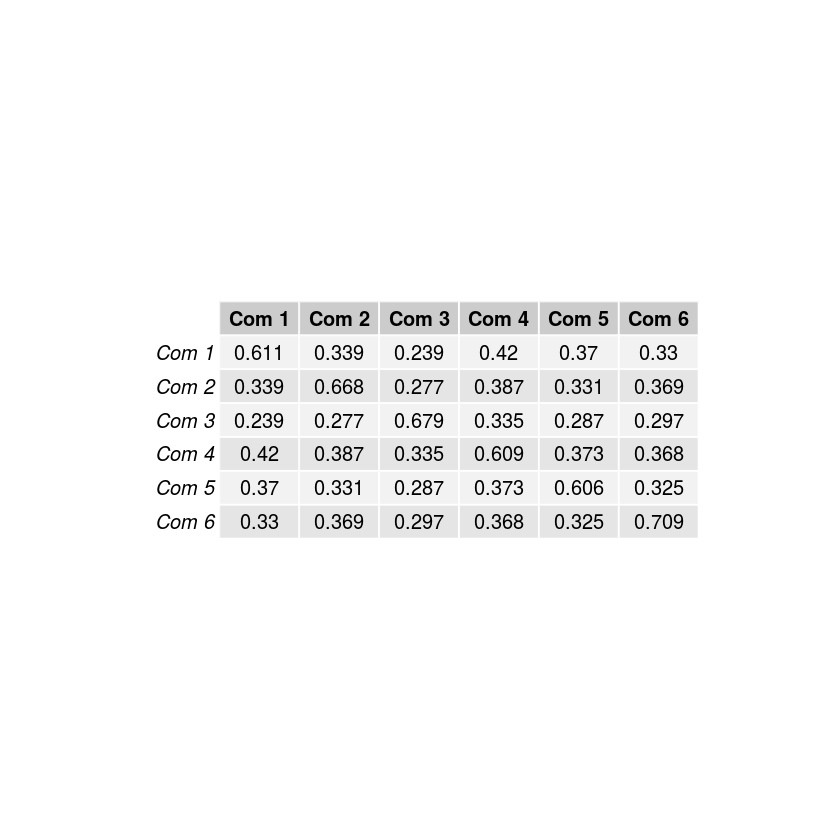

In [67]:
library(gridExtra)
grid.table(resnikClusters)

In [68]:
distances <- numeric(length = (numCom * (numCom - 1)) / 2)
semSims <- numeric(length = (numCom * (numCom - 1)) / 2)

completed <- 0

for (c1 in 1:length(g)) {
    
    for (c2 in c1:length(g)) {
        
        if (c1 == c2) next   
        
        completed <- completed + 1  
        semSims[completed] <- wangClusters[c1, c2]
            
        distances[completed] <- shortest.path[c1, c2]
        
        print(sprintf("Completed: %s", completed))
    }
}

[1] "Completed: 1"
[1] "Completed: 2"
[1] "Completed: 3"
[1] "Completed: 4"
[1] "Completed: 5"
[1] "Completed: 6"
[1] "Completed: 7"
[1] "Completed: 8"
[1] "Completed: 9"
[1] "Completed: 10"
[1] "Completed: 11"
[1] "Completed: 12"
[1] "Completed: 13"
[1] "Completed: 14"
[1] "Completed: 15"


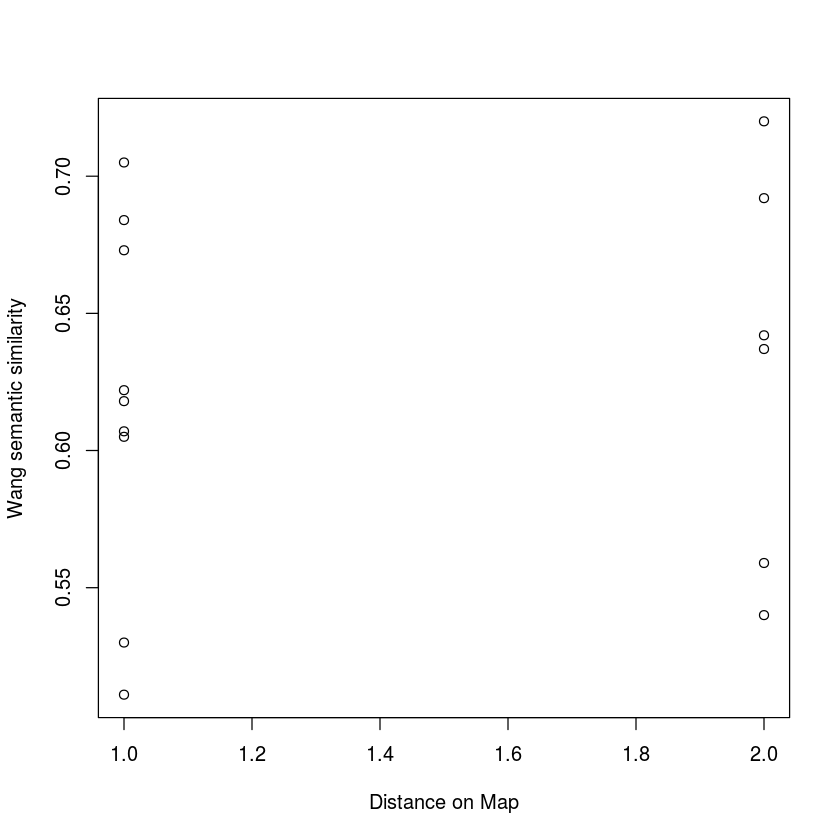

In [69]:
plot(distances, semSims, xlab="Distance on Map", ylab="Wang semantic similarity")